In [17]:
# from bing_image_downloader import downloader
# query_string = "norwegian male"
# downloader.download(query_string, limit = 10000, output_dir="dataset", 
#                     adult_filter_off = True, force_replace = False, timeout=60)

In [18]:
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [19]:
print(tf.__version__)

2.4.0


In [20]:
import pathlib
data_dir = pathlib.Path.cwd() / "dataset"


In [31]:
batch_size = 32
img_height = 180
img_width = 180

In [32]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13677 files belonging to 4 classes.
Using 10942 files for training.


In [33]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13677 files belonging to 4 classes.
Using 2735 files for validation.


In [35]:
class_names = train_ds.class_names
print(class_names)

['indian female', 'indian male', 'norwegian female', 'norwegian male']


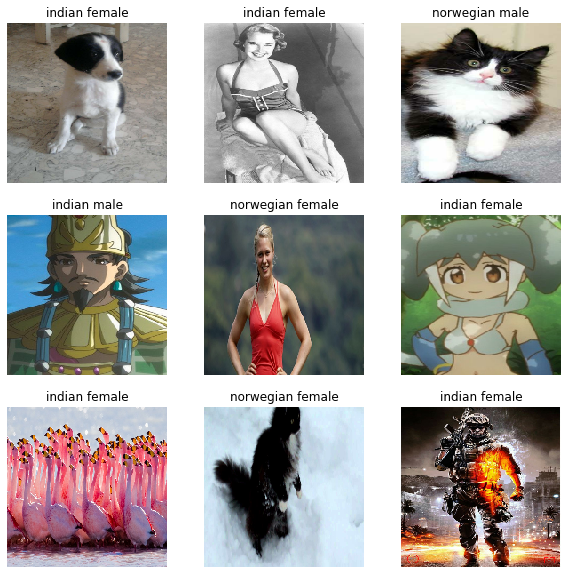

In [37]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1) :
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [39]:
count = 0
for image_batch, label_batch in train_ds :
    print(image_batch.shape, label_batch.shape)
    break
    
    
    

(32, 180, 180, 3) (32,)


In [40]:
from tensorflow.keras import layers 

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1/255)

In [51]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print((first_image), (first_image))

tf.Tensor(
[[[0.42965144 0.42572987 0.41788673]
  [0.42965144 0.42572987 0.41788673]
  [0.43137258 0.427451   0.41960788]
  ...
  [0.2392157  0.24313727 0.22352943]
  [0.23529413 0.2392157  0.21960786]
  [0.227451   0.23137257 0.21176472]]

 [[0.43529415 0.43137258 0.42352945]
  [0.43529415 0.43137258 0.42352945]
  [0.43529415 0.43137258 0.42352945]
  ...
  [0.23529413 0.2392157  0.21960786]
  [0.23529413 0.2392157  0.21960786]
  [0.23137257 0.23529413 0.21568629]]

 [[0.4431373  0.43921572 0.43137258]
  [0.4431373  0.43921572 0.43137258]
  [0.4431373  0.43921572 0.43137258]
  ...
  [0.23529413 0.2392157  0.21960786]
  [0.23529413 0.2392157  0.21960786]
  [0.23137257 0.23529413 0.21568629]]

 ...

 [[0.00784314 0.47058827 0.7537674 ]
  [0.00392157 0.4666667  0.7499729 ]
  [0.00468415 0.46742928 0.75086254]
  ...
  [0.00838328 0.46373016 0.75762534]
  [0.00831975 0.46379367 0.75762534]
  [0.00825617 0.46385726 0.75762534]]

 [[0.00516334 0.48359475 0.7777124 ]
  [0.0090849  0.4875163  0

In [59]:
first_image.shape

TensorShape([180, 180, 3])

In [50]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [52]:
num_classes = 4

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [53]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [54]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3


185/342 [===============>..............] - ETA: 43:17 - loss: 1.3924 - accuracy: 0.187 - ETA: 4:03 - loss: 1.4391 - accuracy: 0.210 - ETA: 3:42 - loss: 1.4388 - accuracy: 0.22 - ETA: 4:27 - loss: 1.4325 - accuracy: 0.23 - ETA: 4:47 - loss: 1.4279 - accuracy: 0.24 - ETA: 4:32 - loss: 1.4223 - accuracy: 0.25 - ETA: 4:44 - loss: 1.4165 - accuracy: 0.26 - ETA: 4:40 - loss: 1.4114 - accuracy: 0.27 - ETA: 4:36 - loss: 1.4073 - accuracy: 0.27 - ETA: 4:41 - loss: 1.4030 - accuracy: 0.28 - ETA: 5:00 - loss: 1.3980 - accuracy: 0.29 - ETA: 5:07 - loss: 1.3925 - accuracy: 0.30 - ETA: 5:07 - loss: 1.3864 - accuracy: 0.31 - ETA: 5:02 - loss: 1.3803 - accuracy: 0.32 - ETA: 4:55 - loss: 1.3739 - accuracy: 0.33 - ETA: 4:53 - loss: 1.3671 - accuracy: 0.34 - ETA: 4:48 - loss: 1.3603 - accuracy: 0.35 - ETA: 4:42 - loss: 1.3530 - accuracy: 0.35 - ETA: 4:38 - loss: 1.3460 - accuracy: 0.36 - ETA: 4:33 - loss: 1.3389 - accuracy: 0.37 - ETA: 4:28 - loss: 1.3319 - accuracy: 0.38 - ETA: 4:24 - loss: 1.3253 - acc

342/342 [==============================] - ETA: 1:58 - loss: 0.7823 - accuracy: 0.69 - ETA: 1:57 - loss: 0.7807 - accuracy: 0.69 - ETA: 1:56 - loss: 0.7791 - accuracy: 0.69 - ETA: 1:56 - loss: 0.7775 - accuracy: 0.69 - ETA: 1:55 - loss: 0.7760 - accuracy: 0.69 - ETA: 1:54 - loss: 0.7744 - accuracy: 0.69 - ETA: 1:53 - loss: 0.7729 - accuracy: 0.69 - ETA: 1:52 - loss: 0.7714 - accuracy: 0.69 - ETA: 1:51 - loss: 0.7698 - accuracy: 0.69 - ETA: 1:50 - loss: 0.7683 - accuracy: 0.69 - ETA: 1:49 - loss: 0.7668 - accuracy: 0.69 - ETA: 1:48 - loss: 0.7653 - accuracy: 0.70 - ETA: 1:47 - loss: 0.7638 - accuracy: 0.70 - ETA: 1:46 - loss: 0.7623 - accuracy: 0.70 - ETA: 1:46 - loss: 0.7608 - accuracy: 0.70 - ETA: 1:45 - loss: 0.7593 - accuracy: 0.70 - ETA: 1:44 - loss: 0.7579 - accuracy: 0.70 - ETA: 1:43 - loss: 0.7564 - accuracy: 0.70 - ETA: 1:42 - loss: 0.7549 - accuracy: 0.70 - ETA: 1:41 - loss: 0.7535 - accuracy: 0.70 - ETA: 1:40 - loss: 0.7520 - accuracy: 0.70 - ETA: 1:40 - loss: 0.7506 - accura

186/342 [===============>..............] - ETA: 2:32 - loss: 0.0375 - accuracy: 0.96 - ETA: 2:25 - loss: 0.0539 - accuracy: 0.96 - ETA: 2:24 - loss: 0.0604 - accuracy: 0.96 - ETA: 2:23 - loss: 0.0658 - accuracy: 0.96 - ETA: 2:23 - loss: 0.0677 - accuracy: 0.96 - ETA: 2:22 - loss: 0.0694 - accuracy: 0.96 - ETA: 2:22 - loss: 0.0739 - accuracy: 0.96 - ETA: 2:22 - loss: 0.0798 - accuracy: 0.96 - ETA: 2:21 - loss: 0.0835 - accuracy: 0.96 - ETA: 2:21 - loss: 0.0859 - accuracy: 0.96 - ETA: 2:21 - loss: 0.0870 - accuracy: 0.96 - ETA: 2:20 - loss: 0.0874 - accuracy: 0.96 - ETA: 2:20 - loss: 0.0872 - accuracy: 0.96 - ETA: 2:19 - loss: 0.0871 - accuracy: 0.96 - ETA: 2:19 - loss: 0.0867 - accuracy: 0.96 - ETA: 2:18 - loss: 0.0864 - accuracy: 0.96 - ETA: 2:18 - loss: 0.0863 - accuracy: 0.97 - ETA: 2:18 - loss: 0.0861 - accuracy: 0.97 - ETA: 2:17 - loss: 0.0868 - accuracy: 0.97 - ETA: 2:17 - loss: 0.0875 - accuracy: 0.97 - ETA: 2:16 - loss: 0.0879 - accuracy: 0.97 - ETA: 2:16 - loss: 0.0886 - accura

342/342 [==============================] - ETA: 1:07 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:07 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:07 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:06 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:06 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1122 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1122 - accuracy: 0.96 - ETA: 59s - loss: 0.1122 - accuracy: 0.9647 - ETA: 59s - loss: 0.1122 - accuracy: 0.964 - ETA: 58s - loss: 0.1122 - accura

186/342 [===============>..............] - ETA: 2:29 - loss: 0.0295 - accuracy: 0.96 - ETA: 2:30 - loss: 0.0418 - accuracy: 0.96 - ETA: 2:30 - loss: 0.0419 - accuracy: 0.97 - ETA: 2:30 - loss: 0.0452 - accuracy: 0.97 - ETA: 2:30 - loss: 0.0466 - accuracy: 0.97 - ETA: 2:29 - loss: 0.0489 - accuracy: 0.96 - ETA: 2:29 - loss: 0.0508 - accuracy: 0.96 - ETA: 2:28 - loss: 0.0533 - accuracy: 0.96 - ETA: 2:28 - loss: 0.0552 - accuracy: 0.96 - ETA: 2:27 - loss: 0.0565 - accuracy: 0.96 - ETA: 2:27 - loss: 0.0571 - accuracy: 0.96 - ETA: 2:27 - loss: 0.0572 - accuracy: 0.96 - ETA: 2:26 - loss: 0.0570 - accuracy: 0.96 - ETA: 2:26 - loss: 0.0571 - accuracy: 0.96 - ETA: 2:26 - loss: 0.0569 - accuracy: 0.96 - ETA: 2:25 - loss: 0.0569 - accuracy: 0.96 - ETA: 2:25 - loss: 0.0571 - accuracy: 0.96 - ETA: 2:24 - loss: 0.0572 - accuracy: 0.96 - ETA: 2:24 - loss: 0.0574 - accuracy: 0.96 - ETA: 2:23 - loss: 0.0577 - accuracy: 0.96 - ETA: 2:23 - loss: 0.0578 - accuracy: 0.96 - ETA: 2:22 - loss: 0.0585 - accura

342/342 [==============================] - ETA: 1:09 - loss: 0.0799 - accuracy: 0.96 - ETA: 1:08 - loss: 0.0799 - accuracy: 0.96 - ETA: 1:08 - loss: 0.0800 - accuracy: 0.96 - ETA: 1:08 - loss: 0.0800 - accuracy: 0.96 - ETA: 1:07 - loss: 0.0800 - accuracy: 0.96 - ETA: 1:07 - loss: 0.0800 - accuracy: 0.96 - ETA: 1:06 - loss: 0.0800 - accuracy: 0.96 - ETA: 1:06 - loss: 0.0800 - accuracy: 0.96 - ETA: 1:05 - loss: 0.0800 - accuracy: 0.96 - ETA: 1:05 - loss: 0.0800 - accuracy: 0.96 - ETA: 1:04 - loss: 0.0801 - accuracy: 0.96 - ETA: 1:04 - loss: 0.0801 - accuracy: 0.96 - ETA: 1:03 - loss: 0.0801 - accuracy: 0.96 - ETA: 1:03 - loss: 0.0801 - accuracy: 0.96 - ETA: 1:03 - loss: 0.0801 - accuracy: 0.96 - ETA: 1:02 - loss: 0.0801 - accuracy: 0.96 - ETA: 1:02 - loss: 0.0801 - accuracy: 0.96 - ETA: 1:01 - loss: 0.0801 - accuracy: 0.96 - ETA: 1:01 - loss: 0.0801 - accuracy: 0.96 - ETA: 1:00 - loss: 0.0801 - accuracy: 0.96 - ETA: 1:00 - loss: 0.0801 - accuracy: 0.96 - ETA: 59s - loss: 0.0801 - accurac

In [98]:
from keras.models import load_model
import cv2
import numpy as np


img = cv2.imread('test2.jpg')
img = cv2.resize(img,(180,180))
img = np.reshape(img,[1,180,180,3])

class1 = model.predict_classes(img)

C:\Users\aj\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [99]:
class1

array([2], dtype=int64)